# Análisis de componentes principales

## Training Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
df_players = pd.read_parquet('../data/processed/df_players.parquet')
df_players

,NombreCompleto,Puntos_suma,ReboteDefensivo_suma,ReboteOfensivo_suma,RebotesTotales_suma,Asistencias_suma,Recuperaciones_suma,Perdidas_suma,TaponCometido_suma,TaponRecibido_suma,FaltaCometida_suma,FaltaRecibida_suma,Valoracion_suma,TirosDosAciertos_suma,TirosDosFallos_suma,TirosTresAciertos_suma,TirosTresFallos_suma,TirosLibresAciertos_suma,TirosLibresFallos_suma,plus_minus_suma,plays_consumidas_suma,plays_jugadas_suma,rebote_of_disp_suma,rebote_def_disp_suma,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_suma,TiempoJuego_seg_suma,TiempoJuego_min_suma,IdJugador,IdClub,IdEquipo,Nombre,TiempoJuego,CincoInicial,equipo,partido_key,nacionalidad,rival,fecha_hora,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,RebotesTotales_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,min_q4_prom_40min,min_q4_y_prorroga_prom_40min,min_clutch_prom_40min,posesiones_finalizadas_prom_40min,TiempoJuego_seg_prom_40min,TiempoJuego_min_prom_40min,TirosDeCampo_suma,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,game_score_suma,ORTG,puntos_clutch_prom_5min,puntos_q4pror_prom_10min,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
0,"AALIYA, LEE ABRAHAM",261.0,82.0,42.0,124.0,18.0,18.0,25.0,25.0,4.0,60.0,51.0,252.0,79.0,51.0,23.0,74.0,34.0,31.0,98.0,278.0,1508.0,663.0,683.0,104.0,2.0,202.59,202.59,15.06,238.60,37472.0,624.533333,326138,1790,69616,"AALIYA, L.",21:02,False,INSTITUTO,INSTITUTO vs QUIMSA (002/12/2024 22:10),Argentino,QUIMSA,02/12/2024,16.716482,5.251921,2.690009,7.941930,1.152861,1.152861,1.601196,1.601196,0.256191,3.842869,3.266439,16.140051,5.059778,3.266439,1.473100,4.739539,2.177626,1.985482,6.276687,17.805295,96.584116,42.463706,43.744663,12.975448,12.975448,0.964560,15.281810,2400.0,40.0,227.0,8.992806,50.000000,6.334842,12.005857,9.212481,0.149780,23.711340,51.056338,18.435013,0.720000,233.6,109.388097,0.664011,5.133521,34,6.870588,18.368627
1,"ACEVEDO, MAXIMILIANO JUNIORS",2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,-6.0,4.0,26.0,15.0,10.0,2.0,0.0,10.79,10.79,1.32,3.00,694.0,11.566667,149814,2305,69510,"ACEVEDO, M.",00:00,False,OBERA,OBERA vs RIACHUELO (LR) (001/12/2024 21:00),Argentino,RIACHUELO,01/12/2024,6.916427,3.458213,3.458213,6.916427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.458213,3.458213,6.916427,0.000000,3.458213,0.000000,0.000000,-20.749280,13.832853,89.913545,51.873199,34.582133,37.314121,37.314121,4.564841,10.374640,2400.0,40.0,4.0,0.000000,25.000000,6.666667,10.000000,8.000000,0.000000,0.000000,25.000000,15.384615,NaN,1.8,66.666667,0.000000,1.853568,4,0.450000,2.891667
2,"ACEVEDO, SEBASTIAN IGNACIO",285.0,104.0,24.0,128.0,24.0,26.0,30.0,1.0,5.0,84.0,65.0,266.0,55.0,59.0,43.0,76.0,46.0,9.0,-12.0,287.0,2047.0,992.0,828.0,64.0,12.0,242.03,249.60,44.73,263.20,50524.0,842.066667,209965,1426,69281,"ACEVEDO, S.",21:53,True,SAN MARTIN (C),SAN MARTIN (C) vs GIMNASIA (CR) (004/12/2024 2...,Argentino,GIMNASIA,04/12/2024,13.538120,4.940226,1.140052,6.080279,1.140052,1.235057,1.425065,0.047502,0.237511,3.990183,3.087642,12.635579,2.612620,2.802628,2.042594,3.610165,2.185100,0.427520,-0.570026,13.633125,97.236957,47.122160,39.331803,11.496952,11.856543,2.124772,12.502573,2400.0,40.0,233.0,10.452962,51.287554,2.419355,12.560386,7.032967,0.197425,36.134454,55.404355,14.020518,0.800000,239.4,108.282675,1.341382,2.564103,38,6.300000,22.159649
3,"ACTIS, JOAQUIN MATIAS",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,

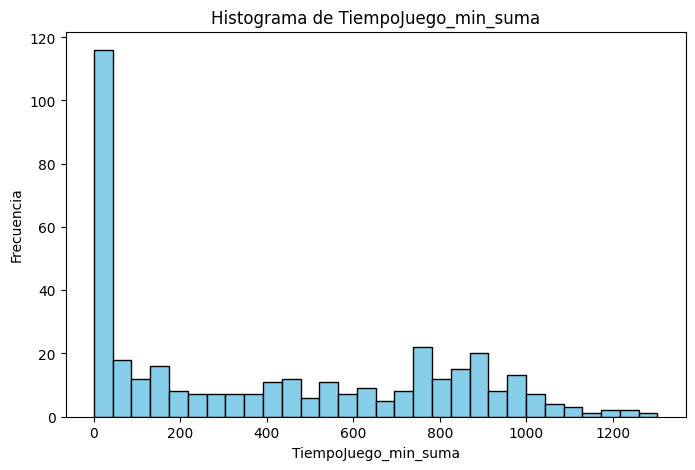

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['TiempoJuego_min_suma'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('TiempoJuego_min_suma')
plt.ylabel('Frecuencia')
plt.title('Histograma de TiempoJuego_min_suma')
plt.show()

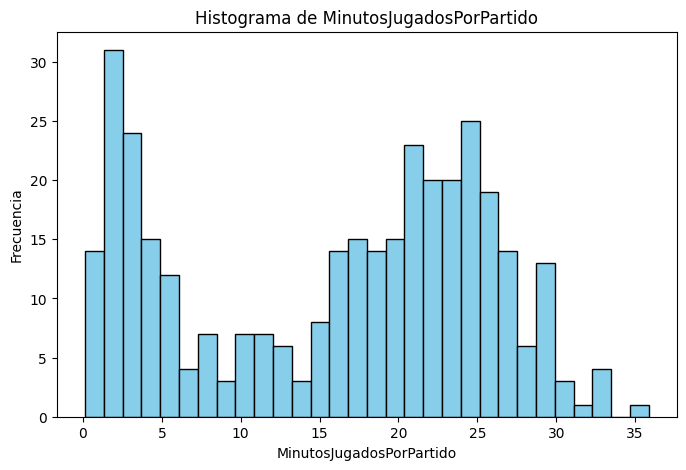

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['MinutosJugadosPorPartido'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('MinutosJugadosPorPartido')
plt.ylabel('Frecuencia')
plt.title('Histograma de MinutosJugadosPorPartido')
plt.show()

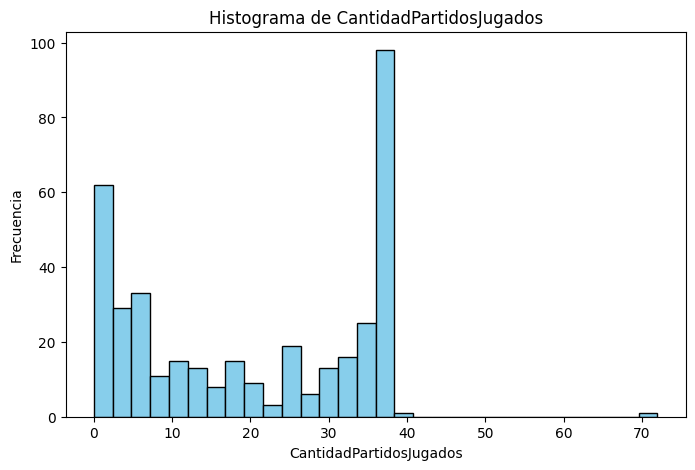

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['CantidadPartidosJugados'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('CantidadPartidosJugados')
plt.ylabel('Frecuencia')
plt.title('Histograma de CantidadPartidosJugados')
plt.show()

In [7]:
df_players.shape

(377, 90)

In [8]:
df_players[
    ((df_players['MinutosJugadosPorPartido'] > 3) &
     (df_players['CantidadPartidosJugados'] > 5)) |
    (df_players['TiempoJuego_min_suma'] > 60)
].shape

(268, 90)

Los criterio para mantener a los jugadores en el conjunto de entrenamiento serán:
- Jugadores que hayan disputado más de 5 partido 
- Jugadores que hayan disputado más de 3 minutos por partido en promedio

O bien:
- Jugadores que hayan jugado mas de 60 minutos durante toda la temporada

In [9]:
df_train = df_players[
    ((df_players['MinutosJugadosPorPartido'] > 3) &
     (df_players['CantidadPartidosJugados'] > 5)) |
    (df_players['TiempoJuego_min_suma'] > 60)
]


In [10]:
df_train.columns

Index(['NombreCompleto', 'Puntos_suma', 'ReboteDefensivo_suma',
       'ReboteOfensivo_suma', 'RebotesTotales_suma', 'Asistencias_suma',
       'Recuperaciones_suma', 'Perdidas_suma', 'TaponCometido_suma',
       'TaponRecibido_suma', 'FaltaCometida_suma', 'FaltaRecibida_suma',
       'Valoracion_suma', 'TirosDosAciertos_suma', 'TirosDosFallos_suma',
       'TirosTresAciertos_suma', 'TirosTresFallos_suma',
       'TirosLibresAciertos_suma', 'TirosLibresFallos_suma', 'plus_minus_suma',
       'plays_consumidas_suma', 'plays_jugadas_suma', 'rebote_of_disp_suma',
       'rebote_def_disp_suma', 'puntos_q4_y_prorroga_suma',
       'puntos_clutch_suma', 'min_q4_suma', 'min_q4_y_prorroga_suma',
       'min_clutch_suma', 'posesiones_finalizadas_suma',
       'TiempoJuego_seg_suma', 'TiempoJuego_min_suma', 'IdJugador', 'IdClub',
       'IdEquipo', 'Nombre', 'TiempoJuego', 'CincoInicial', 'equipo',
       'partido_key', 'nacionalidad', 'rival', 'fecha_hora',
       'Puntos_prom_40min', 'ReboteDe

In [11]:
variables_standar = ['NombreCompleto', 'Nombre', 'nacionalidad', 'CincoInicial', 'equipo', 
'Puntos_prom_40min','ReboteDefensivo_prom_40min', 'ReboteOfensivo_prom_40min',
'Asistencias_prom_40min','Recuperaciones_prom_40min', 'Perdidas_prom_40min',
'TaponCometido_prom_40min', 'TaponRecibido_prom_40min',
'FaltaCometida_prom_40min', 'FaltaRecibida_prom_40min',
'Valoracion_prom_40min', 'TirosDosAciertos_prom_40min',
'TirosDosFallos_prom_40min', 'TirosTresAciertos_prom_40min',
'TirosTresFallos_prom_40min', 'TirosLibresAciertos_prom_40min',
'TirosLibresFallos_prom_40min', 'plus_minus_prom_40min',
'plays_consumidas_prom_40min', 'plays_jugadas_prom_40min',
'rebote_of_disp_prom_40min', 'rebote_def_disp_prom_40min',
'puntos_q4pror_prom_10min', 'puntos_clutch_prom_5min',
'puntos_q4_y_prorroga_suma', 'puntos_clutch_suma', 'min_q4_suma',
'min_q4_y_prorroga_suma', 'min_clutch_suma',
'posesiones_finalizadas_prom_40min', 
'TOV%', 'eFG%', 'ORB%', 'DRB%', 'RB%', 'FTr', '3PT%', 'TS%', 'USG%', 'AST/TOVr',
'CantidadPartidosJugados', 'game_score_prom','MinutosJugadosPorPartido']
df_train[variables_standar]

,NombreCompleto,Nombre,nacionalidad,CincoInicial,equipo,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,puntos_q4pror_prom_10min,puntos_clutch_prom_5min,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_prom_40min,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
0,"AALIYA, LEE ABRAHAM","AALIYA, L.",Argentino,False,INSTITUTO,16.716482,5.251921,2.690009,1.152861,1.152861,1.601196,1.601196,0.256191,3.842869,3.266439,16.140051,5.059778,3.266439,1.473100,4.739539,2.177626,1.985482,6.276687,17.805295,96.584116,42.463706,43.744663,5.133521,0.664011,104.0,2.0,202.59,202.59,15.06,15.281810,8.992806,50.000000,6.334842,12.005857,9.212481,0.149780,23.711340,51.056338,18.435013,0.720000,34,6.870588,18.368627
2,"ACEVEDO, SEBASTIAN IGNACIO","ACEVEDO, S.",Argentino,True,SAN MARTIN (C),13.538120,4.940226,1.140052,1.140052,1.235057,1.425065,0.047502,0.237511,3.990183,3.087642,12.635579,2.612620,2.802628,2.042594,3.610165,2.185100,0.427520,-0.570026,13.633125,97.236957,47.122160,39.331803,2.564103,1.341382,64.0,12.0,242.03,249.60,44.73,12.502573,10.452962,51.287554,2.419355,12.560386,7.032967,0.197425,36.134454,55.404355,14.020518,0.800000,38,6.300000,22.159649
4,"ACUÑA, ROBERTO SANTIAGO","ACUÑA, R.",Argentino,False,INSTITUTO,12.969353,5.784453,2.983560,1.217780,0.974224,1.704891,0.669779,0.608890,4.810229,2.922671,14.491577,5.297341,3.592450,0.121778,0.913335,2.009336,1.400447,6.941344,13.091131,83.539679,36.472498,36.350721,3.387916,0.614628,48.0,2.0,141.68,141.68,16.27,10.146539,13.023256,55.214724,8.180301,15.912898,12.040134,0.202454,11.764706,56.757621,15.670554,0.714286,35,5.594286,18.769524
5,"AGUERRE, FEDERICO MATIAS","AGUERRE, F.",Argentino,True,RIACHUELO (LR),13.194345,7.453948,1.456519,1.585035,0.728259,1.370841,0.556904,0.171355,2.955876,3.212909,17.521062,2.184778,2.141939,2.184778,3.427103,2.270456,0.599743,3.084392,12.637441,77.024133,29.987148,38.554905,2.870323,0.860956,56.0,8.0,195.10,195.10,46.46,11.115808,10.847458,54.956897,4.857143,19.333333,13.000000,0.228448,38.931298,58.895518,16.407119,1.156250,36,8.366667,25.937037
6,"AGUIRRE, GUSTAVO NICOLAS","AGUIRRE, G.",Argentino,True,REGATAS (C),10.754585,6.478665,0.863822,3.844008,1.338924,1.900409,0.000000,0.129573,2.375511,3.196142,15.160077,2.289128,2.289128,1.554880,4.275919,1.511689,0.345529,0.691058,13.130095,85.302428,37.360304,39.951770,2.023121,2.074689,42.0,23.0,203.00,207.60,55.43,12.262818,14.473684,44.398340,2.312139,16.216216,9.497207,0.145228,26.666667,47.899354,15.392405,2.022727,34,7.641176,27.238725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,"WATSON, EARL OVREL","WATSON, E.",Estadounidense,False,ATENAS (C),9.504380,7.200288,5.184207,0.864035,1.728069,2.304092,0.288012,0.576023,2.880115,3.456138,13.536541,4.032161,6.624265,0.000000,0.000000,1.440058,2.304092,-4.608184,14.688588,111.172447,50.978039,48.385935,0.441696,0.000000,2.0,0.0,45.28,45.28,0.74,9.458298,15.686275,37.837838,10.169492,14.880952,12.463768,0.135135,NaN,38.623596,13.212435,0.375000,12,2.966667,11.573611
371,"WHELAN, GASTON","WHELAN, G.",Argentino,True,UNION (SF),19.985110,4.367607,0.727934,4.764662,1.389693,2.779386,0.066176,0.397055,3.904376,7.742576,23.624783,4.897014,3.970552,1.455869,2.713210,5.823476

## PCA para graficar

In [21]:
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Variables (limpiadas: removí el string vacío)
variables_numeric = [
    'Puntos_prom_40min','ReboteDefensivo_prom_40min','ReboteOfensivo_prom_40min',
    'Asistencias_prom_40min','Recuperaciones_prom_40min','Perdidas_prom_40min',
    'TaponCometido_prom_40min','TaponRecibido_prom_40min',
    'FaltaCometida_prom_40min','FaltaRecibida_prom_40min',
    'Valoracion_prom_40min','TirosDosAciertos_prom_40min',
    'TirosDosFallos_prom_40min','TirosTresAciertos_prom_40min',
    'TirosTresFallos_prom_40min','TirosLibresAciertos_prom_40min',
    'TirosLibresFallos_prom_40min','plus_minus_prom_40min',
    'plays_consumidas_prom_40min','plays_jugadas_prom_40min',
    'rebote_of_disp_prom_40min','rebote_def_disp_prom_40min',
    'puntos_q4pror_prom_10min','puntos_clutch_prom_5min',
    'posesiones_finalizadas_prom_40min','TOV%','eFG%','ORB%','DRB%','RB%','FTr',
    'TS%','USG%','AST/TOVr','CantidadPartidosJugados','game_score_prom',
    'MinutosJugadosPorPartido'
]

# Seleccionar y limpiar datos
cols_keep = ['Nombre', 'NombreCompleto'] + variables_numeric
df_pca = df_train[cols_keep].dropna(subset=variables_numeric).reset_index(drop=True)

# Escalado y PCA
X = df_pca[variables_numeric].values
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=0)
pc = pca.fit_transform(Xs)

explained = pca.explained_variance_ratio_
print(f'Varianza explicada PC1={explained[0]:.3f}, PC2={explained[1]:.3f}')


Varianza explicada PC1=0.292, PC2=0.178


In [22]:
cluster_0_0 = [
    "FERGUSON, ROMEAO VENILL",
    "NEGRETE, ALEX",
    "THOMAS JR, MARCUS WILEY",
    "BOND JR, TIMOTHY LAMONT",
    "ROBINSON, BRANDON LAMAR",
    "POMOLI LARRABURU, NICOLA",
    "NATION, ANDRE JAMES",
    "ROQUE MARTINEZ, ROMARIO JOSE",
    "FLOR, ERIC FABIAN",
    "ROMANO, NICOLAS",
]

cluster_0_1 = [
    "MILLER, TAVARIO EARNEST PTRISTIAN",
    "LOWERY, DISHON LURELL",
    "GARELLO, VICENTE",
    "LOUIS, ARNOLD MICHAEL",
    "GRATEROL CLEMENTE, WINDI MANUEL",
    "OBERTO, JUAN CRUZ MATEO",
    "IANGUAS, PEDRO HENRIQUE",
    "RODRIGUEZ ORTEGA, MANUEL",
    "HUNT, DARIO NATHAN HENRY",
    "NALLY, JUAN TOMAS",
]

cluster_0_2 = [
    "CRAION JR, MICHAEL JOE",
    "ACUÑA, ROBERTO SANTIAGO",
    "FILIPPETTI SATURNO, ENZO MATEO",
    "ALORDA, FRANCO",
    "DIGGS, AVERY GERELL",
    "BOMBINO PARADA, PEDRO ANTONIO",
    "CALFANI PERSINCULA, MATHIAS KENY",
    "DELIA, MARCOS NICOLAS",
    "SANCHEZ, RODRIGO HERNAN",
    "ALEXANDER, QUINTIN IMMANUEL",
]

cluster_1_0 = [
    "ALIENDE, GUILLERMO ALFONZO",
    "BOTTA, TOMAS",
    "CABOT DOMINGUEZ, MARCOS",
    "MONTERO, JOSE IGNACIO",
    "TORETTA, EMILIANO",
    "GARGALLO, LUCAS HERNAN",
    "FERNANDEZ, VICTOR LUIS",
    "DE LOS SANTOS, NICOLAS",
    "JARA, CESAR AGUSTIN",
    "COPELLO, NICOLAS",
]

cluster_1_1 = [
    "CORDOBA, GASTON EZEQUIEL",
    "MATA, MARCOS DANIEL",
    "DIEZ, ALEJANDRO GABRIEL",
    "PEREZ DOUTHAT, SANTIAGO",
    "GILETTO, SALVADOR",
    "HURE, DANIEL HERNAN",
    "ACEVEDO, SEBASTIAN IGNACIO",
    "TORRESI, JONATAN FABIAN",
    "PIÑERO, PATRICIO",
    "ASCANIO SOLORZANO, JOSE GREGORIO",
]

cluster_1_2 = [
    "APREA, JULIAN PABLO",
    "BETTIGA, LEONEL VALENTIN",
    "LUGO, SEBASTIAN EZEQUIEL",
    "GIORGETTI, FRANCO NAHUEL",
    "GARCIA, GASTON LEONEL",
    "MARIN, ANIBAL FEDERICO JUAN",
    "LEDESMA, RAMIRO",
    "JENKINS, JALEN KEMAL",
    "AGUIRRE, GUSTAVO NICOLAS",
    "BASABE, EMILIANO GUILLERMO",
]

cluster_2_0 = [
    "FIGUEREDO, DIEGO RAFAEL",
    "FRANCO, NICOLAS ARIEL",
    "STENTA, NICOLAS",
    "RESPAUD, JUAN IGNACIO",
    "DATO, MARTINIANO",
    "GUERRERO MARGARIT, JUAN MARTIN",
    "SCALA, SANTIAGO NICOLAS",
    "VILDOZA, LEANDRO",
    "ANDUJAR, LUCAS",
    "PINEDA, DAMIAN",
]

cluster_2_1 = [
    "DIGON, ALEJO ADRIEL",
    "GARCIA GUERRERO, JORGE LUIS",
    "MAGGI, ALEJO",
    "QUIROGA, NICOLAS ALEJO",
    "MOUSSA, FAUSTO",
    "CAPPONI, FEBO LORENZO",
    "CHIARAVIGLIO, NICOLAS",
    "FIELDS, CALEB JOSEPH",
    "FERNANDEZ ALVAREZ, JOAQUIN",
    "BARCO, JEREMIAS",
]

cluster_2_2 = [
    "BORSATTI, MATIAS DANIEL",
    "ALONSO, GONZALO NICOLAS",
    "CAPELLI, SANTIAGO",
    "ARAUJO, MAXIMO",
    "ROCA, THIAGO EMMANUEL",
    "TAVARES DE OLIVEIRA, MAIQUE",
    "ZURSCHMITTEN, NICOLAS AGUSTIN",
    "PAYTON CLOTTEY, EMMANUEL TRAVON",
    "LATORRE, LUCAS",
    "ROLFI, FORTUNATO JOSE",
]


C:\Users\roman.landa\AppData\Local\Temp\ipykernel_28692\2252699611.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(clusters_colorizados))


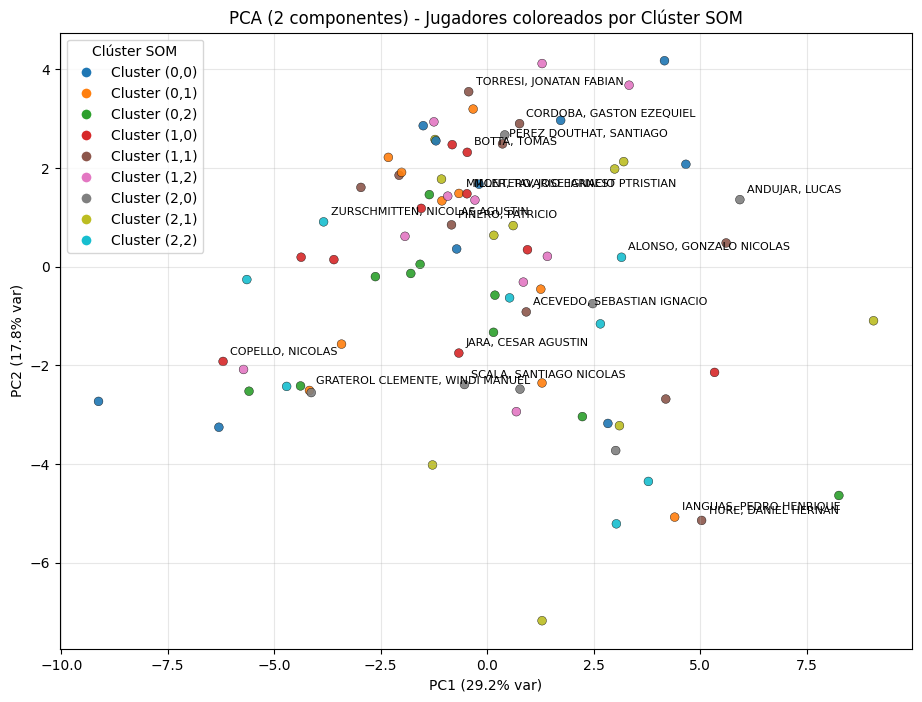

In [25]:
mostrar_sin_cluster = False

def asignar_cluster(nombre):
    if nombre in cluster_0_0: return "(0,0)"
    elif nombre in cluster_0_1: return "(0,1)"
    elif nombre in cluster_0_2: return "(0,2)"
    elif nombre in cluster_1_0: return "(1,0)"
    elif nombre in cluster_1_1: return "(1,1)"
    elif nombre in cluster_1_2: return "(1,2)"
    elif nombre in cluster_2_0: return "(2,0)"
    elif nombre in cluster_2_1: return "(2,1)"
    elif nombre in cluster_2_2: return "(2,2)"
    else: return "Sin_cluster"

df_pca['cluster'] = df_pca['NombreCompleto'].apply(asignar_cluster)

# ============================================
# Filtrar si no queremos mostrar los "Sin_cluster"
# ============================================
if not mostrar_sin_cluster:
    df_plot = df_pca[df_pca['cluster'] != "Sin_cluster"].copy()
else:
    df_plot = df_pca.copy()

# ============================================
# Asignar colores por clúster
# ============================================
unique_clusters = sorted(df_plot['cluster'].unique())

# Excluir "Sin_cluster" de la paleta de colores principal
clusters_colorizados = [cl for cl in unique_clusters if cl != "Sin_cluster"]

colors = plt.cm.get_cmap('tab10', len(clusters_colorizados))
cluster_to_color = {cl: colors(i) for i, cl in enumerate(clusters_colorizados)}

# Asignar gris a los sin clúster
cluster_to_color["Sin_cluster"] = "lightgray"

# Vector de colores final
cluster_colors = df_plot['cluster'].map(cluster_to_color)

# ============================================
# Gráfico PCA
# ============================================
x, y = pc[:, 0], pc[:, 1]
plt.figure(figsize=(11, 8))

# Scatter plot
sc = plt.scatter(
    x[:len(df_plot)], y[:len(df_plot)],
    c=cluster_colors,
    s=40, alpha=0.9, edgecolor='k', linewidth=0.3
)

# Leyenda
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cl}',
               markerfacecolor=cluster_to_color[cl], markersize=8)
    for cl in clusters_colorizados
]

# Agregar "Sin_cluster" a la leyenda solo si se muestran
if mostrar_sin_cluster and "Sin_cluster" in unique_clusters:
    handles.append(
        plt.Line2D([0], [0], marker='o', color='w', label='Sin clúster',
                   markerfacecolor='lightgray', markersize=8)
    )

plt.legend(handles=handles, title='Clúster SOM', loc='best', frameon=True)

# Etiquetas y formato
plt.xlabel(f'PC1 ({explained[0]:.1%} var)')
plt.ylabel(f'PC2 ({explained[1]:.1%} var)')
plt.title('PCA (2 componentes) - Jugadores coloreados por Clúster SOM')

# ============================================
# Etiquetas de algunos jugadores
# ============================================
n = len(df_plot)
n_labels = min(30, max(5, int(0.2 * n)))
sel_idx = random.sample(range(n), n_labels)
names = df_plot.iloc[sel_idx]['NombreCompleto'].values

try:
    from adjustText import adjust_text
    texts = [plt.text(x[i], y[i], names[j], fontsize=8) for j, i in enumerate(sel_idx)]
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5), force_points=0.2)
except Exception:
    placed = []
    for i, name in zip(sel_idx, names):
        xi, yi = x[i], y[i]
        too_close = any((xi - xp)**2 + (yi - yp)**2 < 0.003 for xp, yp in placed)
        if too_close:
            continue
        plt.annotate(name, (xi, yi), xytext=(5, 5), textcoords='offset points', fontsize=8)
        placed.append((xi, yi))

plt.grid(alpha=0.3)
plt.show()